In [ ]:
# Analyzing the HR Analytics dataset from https://www.kaggle.com/jacksonchou/hr-analytics
      

In [ ]:
# Importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from numpy.ma.extras import average
import plotly.express as px


range(1, 11)


[[0.38 0.53 2.   ... 0.   1.   0.  ]
 [0.8  0.86 5.   ... 0.   1.   0.  ]
 [0.11 0.88 7.   ... 0.   1.   0.  ]
 ...
 [0.37 0.53 2.   ... 0.   1.   0.  ]
 [0.11 0.96 6.   ... 0.   1.   0.  ]
 [0.37 0.52 2.   ... 0.   1.   0.  ]]
       satisfaction  eval  projects  ...  accident  left  promotion
0              0.38  0.53       2.0  ...       0.0   1.0        0.0
1              0.80  0.86       5.0  ...       0.0   1.0        0.0
2              0.11  0.88       7.0  ...       0.0   1.0        0.0
3              0.72  0.87       5.0  ...       0.0   1.0        0.0
4              0.37  0.52       2.0  ...       0.0   1.0        0.0
...             ...   ...       ...  ...       ...   ...        ...
14994          0.40  0.57       2.0  ...       0.0   1.0        0.0
14995          0.37  0.48       2.0  ...       0.0   1.0        0.0
14996          0.37  0.53       2.0  ...       0.0   1.0        0.0
14997          0.11  0.96       6.0  ...       0.0   1.0        0.0
14998          0.37  0.5

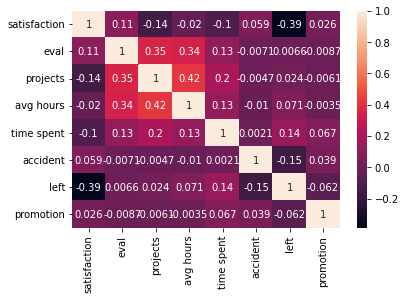

In [ ]:
# extract data from csv
dataset = pd.read_csv('HR_comma_sep.csv')

X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -4].values

# replacing missing datapoints
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
print(X)

# Correlation Matrix
df = pd.DataFrame(X,columns=['satisfaction','eval','projects', 'avg hours', 'time spent', 'accident', 'left', 'promotion'])
print(df)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


# Preprocessing
# Encoding independent variables
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
#X = np.array(ct.fit_transform(X))
#print(X[1])

# Encoding the dependent variable
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)
# print(y)

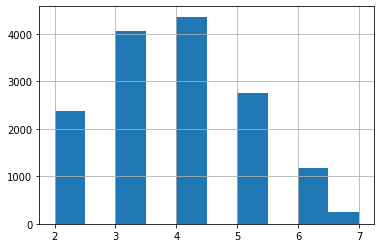

In [ ]:
# Exploratory Data Analysis

df['projects'].hist()


In [ ]:
px.histogram(df, x='satisfaction', color='left')

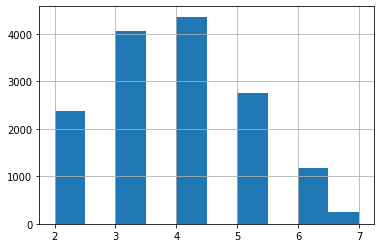

In [ ]:
df['projects'].hist()

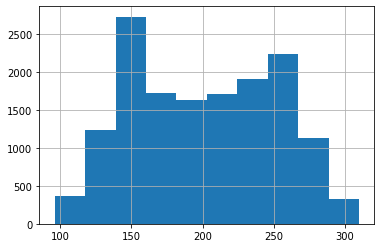

In [ ]:
df['avg hours'].hist()

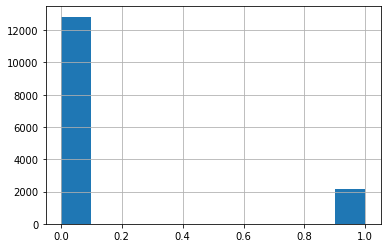

In [ ]:
df['accident'].hist()

In [ ]:
from numpy.ma.extras import average

# filtering out good emoployees that we dont want to lose

X = df[df['eval'] >= average(df['eval'])]
X = X[X['time spent'] >= 5]

y = X['left']
X=X.drop(columns=['left'])


print(X)

       satisfaction  eval  projects  avg hours  time spent  accident  promotion
1              0.80  0.86       5.0      262.0         6.0       0.0        0.0
3              0.72  0.87       5.0      223.0         5.0       0.0        0.0
7              0.92  0.85       5.0      259.0         5.0       0.0        0.0
8              0.89  1.00       5.0      224.0         5.0       0.0        0.0
12             0.84  0.92       4.0      234.0         5.0       0.0        0.0
...             ...   ...       ...        ...         ...       ...        ...
14983          0.72  0.84       5.0      257.0         5.0       0.0        0.0
14985          0.91  0.99       5.0      254.0         5.0       0.0        0.0
14986          0.85  0.85       4.0      247.0         6.0       0.0        0.0
14990          0.89  0.88       5.0      228.0         5.0       1.0        0.0
14993          0.76  0.83       6.0      293.0         6.0       0.0        0.0

[1829 rows x 7 columns]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

       satisfaction  eval  projects  avg hours  time spent  accident  promotion
1979           0.92  0.82       5.0      265.0         5.0       0.0        0.0
3680           0.97  0.75       2.0      271.0         6.0       0.0        0.0
5861           0.14  0.74       6.0      160.0         5.0       0.0        0.0
14706          0.82  0.99       4.0      263.0         6.0       0.0        0.0
782            0.72  1.00       4.0      245.0         5.0       0.0        0.0
...             ...   ...       ...        ...         ...       ...        ...
7223           0.83  0.98       3.0      229.0         6.0       0.0        0.0
12099          0.90  1.00       5.0      221.0         6.0       0.0        0.0
14405          0.89  0.95       4.0      275.0         5.0       0.0        0.0
1981           0.76  1.00       4.0      220.0         6.0       0.0        0.0
4448           0.97  0.74       3.0      104.0         5.0       0.0        0.0

[1371 rows x 7 columns]
1979     1.0
36

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 1.01720357 -0.8507323   0.5720623  ... -0.59041949 -0.36348619
  -0.15209973]
 [ 1.2035758  -1.74439232 -2.35078519 ...  0.14345641 -0.36348619
  -0.15209973]
 [-1.89020316 -1.87205804  1.54634479 ... -0.59041949 -0.36348619
  -0.15209973]
 ...
 [ 0.90538024  0.80892202 -0.4022202  ... -0.59041949 -0.36348619
  -0.15209973]
 [ 0.42081245  1.4472506  -0.4022202  ...  0.14345641 -0.36348619
  -0.15209973]
 [ 1.2035758  -1.87205804 -1.3765027  ... -0.59041949 -0.36348619
  -0.15209973]]
[[-1.85292872  0.04292771 -1.3765027  ...  0.14345641 -0.36348619
  -0.15209973]
 [ 0.68173356 -0.46773515  0.5720623  ... -0.59041949 -0.36348619
  -0.15209973]
 [ 0.94265468  1.06425345 -0.4022202  ... -0.59041949 -0.36348619
  -0.15209973]
 ...
 [ 0.42081245 -0.46773515 -1.3765027  ...  0.87733231 -0.36348619
  -0.15209973]
 [ 0.60718467  0.6812563   0.5720623  ...  0.14345641 -0.36348619
  -0.15209973]
 [ 0.90538024  0.42592486  0.5720623  ... -0.59041949 -0.36348619
  -0.15209973]]


In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[167  34]
 [ 15 242]]
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       201
         1.0       0.88      0.94      0.91       257

    accuracy                           0.89       458
   macro avg       0.90      0.89      0.89       458
weighted avg       0.89      0.89      0.89       458



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[189  12]
 [  5 252]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       201
         1.0       0.95      0.98      0.97       257

    accuracy                           0.96       458
   macro avg       0.96      0.96      0.96       458
weighted avg       0.96      0.96      0.96       458

